<a href="https://colab.research.google.com/github/maha-92-no/PP1-Santas-Molding-Company/blob/main/pp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PP1 - Santa’s Molding Company

In [ ]:
!pip install mypulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mypulp import *

sns.set()

### A plot that corresponds to the production, storage and demand constraints facing Santa’s Molding Company

In [ ]:
#13x + 15y <= 1440
x = np.arange(0, 120)
y = 1440/15 - (13/15)*x

In [ ]:
#33x + 25y <= 3000
x = np.arange(0, 120)
_y = 3000/25 - (33/25)*x

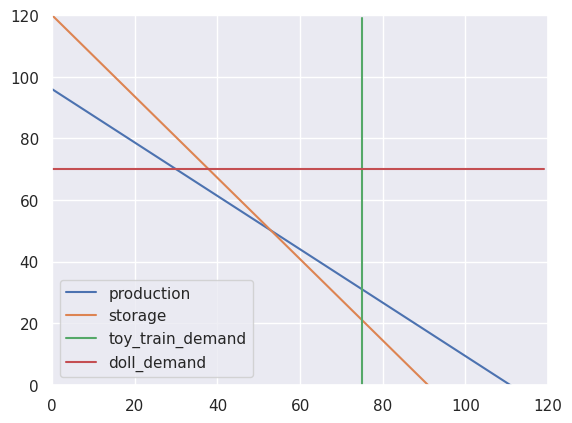

In [ ]:
plt.plot(x, y, label='production')
plt.plot(x, _y, label='storage')
plt.plot(np.repeat(75, 120), x, label='toy_train_demand')
plt.plot(x, np.repeat(70, 120), label='doll_demand')
plt.xlim([0,120])
plt.ylim([0,120])
plt.legend()

### smiles generated if you produce at point a

In [ ]:
model = Model("a")

x1 = model.addVar(name="train")
x2 = model.addVar(name="doll")
model.update()

model.addConstr(x2 == 70)
model.addConstr(13 * x1 + 15 * x2 <= 1440)
model.addConstr(33 * x1 + 25 * x2 <= 3000)
model.setObjective(25 * x1 + 25 * x2, GRB.MAXIMIZE)

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Value=", model.ObjVal)
    for v in model.getVars():
        print(v.VarName, v.X)

Opt. Value= 2500.0
doll 70.0
train 30.0


### At point b

In [ ]:
model = Model("b")

x1 = model.addVar(name="train")
x2 = model.addVar(name="doll")
model.update()

model.addConstr(13 * x1 + 15 * x2 <= 1440)
model.addConstr(33 * x1 + 25 * x2 <= 3000)
model.setObjective(25 * x1 + 25 * x2, GRB.MAXIMIZE)

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Value=", model.ObjVal)
    for v in model.getVars():
        print(v.VarName, v.X)

Opt. Value= 2576.470575
doll 50.117647
train 52.941176


### At point c

In [ ]:
model = Model("c")

x1 = model.addVar(name="train")
x2 = model.addVar(name="doll")
model.update()

model.addConstr(x1 == 75)
model.addConstr(13 * x1 + 15 * x2 <= 1440)
model.addConstr(33 * x1 + 25 * x2 <= 3000)
model.setObjective(25 * x1 + 25 * x2, GRB.MAXIMIZE)

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Value=", model.ObjVal)
    for v in model.getVars():
        print(v.VarName, v.X)

Opt. Value= 2400.0
doll 21.0
train 75.0
